In [164]:
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [165]:
df = pd.read_csv("../해커톤/s_woo.csv", encoding='euc-kr')

X=df[['위안화원_시', '코스피시가', '달러위안화_시', 'WTI', '달러인덱스', '콜금리', '엔원_시']]
y=df['달러원종가']

In [166]:
X['위안화원_시'].mean()


174.98499095840867

In [167]:
X[X.index==3074]

,위안화원_시,코스피시가,달러위안화_시,WTI,달러인덱스,콜금리,엔원_시
3074,199.46,2331.330078,7.0873,79.73,127.17,2.55,9.8682


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_1 = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaler
    ('regressor', LinearRegression())  # Linear regression model
])

pipeline_1.fit(X_train,y_train)
y_pred=pipeline_1.predict(X_test)

coefficients = pipeline_1['regressor'].coef_
intercept = pipeline_1['regressor'].intercept_
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_pred):.3f}")
print("Coefficients (Weights):", coefficients)
print("Intercept (Bias):", intercept)

MSE : 50.915, RMSE:7.136
Variance score:0.991
Coefficients (Weights): [263.78029438   4.47231796 226.56583951  -0.83465662   1.69398467
   7.68538659  -2.98140162]
Intercept (Bias): 960.8086423643653


In [169]:
coef=pd.Series(data=np.round(pipeline_1['regressor'].coef_,2), index=X.columns)
coef

위안화원_시     263.78
코스피시가        4.47
달러위안화_시    226.57
WTI         -0.83
달러인덱스        1.69
콜금리          7.69
엔원_시        -2.98
dtype: float64

In [170]:

result = pd.DataFrame(data={'Y':y_test, 'Y_pred(LR)':y_pred,'diff(LR)':np.round(np.abs(y_test-y_pred),2)})
result.sort_values(by=['diff(LR)'], ascending=False)


,Y,Y_pred(LR),diff(LR)
102,1235.61,1197.922810,37.69
218,1164.50,1127.224313,37.28
93,1194.25,1162.984105,31.27
410,1107.15,1076.186835,30.96
416,1179.85,1149.767720,30.08
...,...,...,...
2813,1163.87,1163.817212,0.05
279,1125.35,1125.401075,0.05
1102,1024.75,1024.771914,0.02
70,1110.50,1110.477748,0.02


## 모델검증 

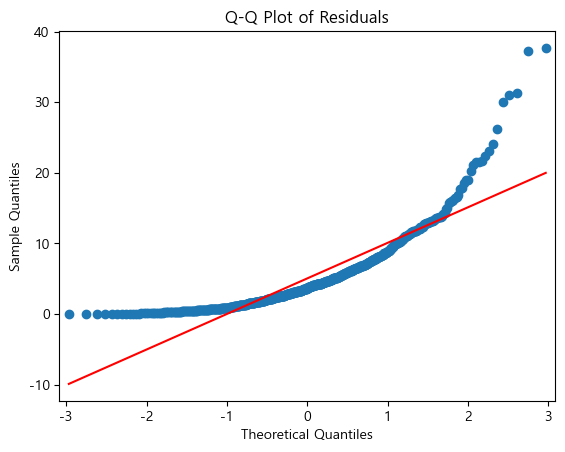

Normality test statistic: 359.6079645110042
p-value: 8.168130772075865e-79


In [181]:
from scipy.stats import normaltest
import statsmodels.api as sm
# Residuals
residuals = result['diff(LR)']

# Residual analysis


# Q-Q Plot
sm.qqplot(residuals.values.flatten(), line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 잔차의 정규성 검정
statistic, p_value = normaltest(residuals.values.flatten())

print("Normality test statistic:", statistic)
print("p-value:", p_value)

In [182]:
# from scipy.stats import jarque_bera
import numpy as np
from scipy.stats import jarque_bera


# Jarque-Bera 정규성 검정 수행
jb_value, p_value = jarque_bera(residuals)

# 검정 통계량과 p-value 출력 (소수점 6번째 자리까지)
print("Jarque-Bera 검정 통계량: {:.6f}".format(jb_value))
print("p-value: {:.6f}".format(p_value))

Jarque-Bera 검정 통계량: 2633.304900
p-value: 0.000000


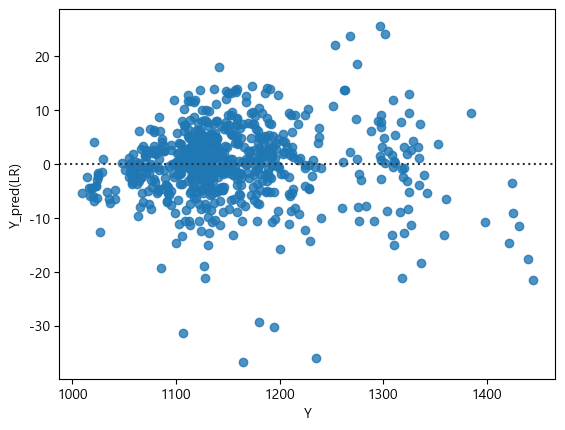

In [185]:
import seaborn as sns

sns.residplot(x=result['Y'],y= result['Y_pred(LR)'])
plt.show()

In [186]:
np.mean(residuals)

5.054563253012049

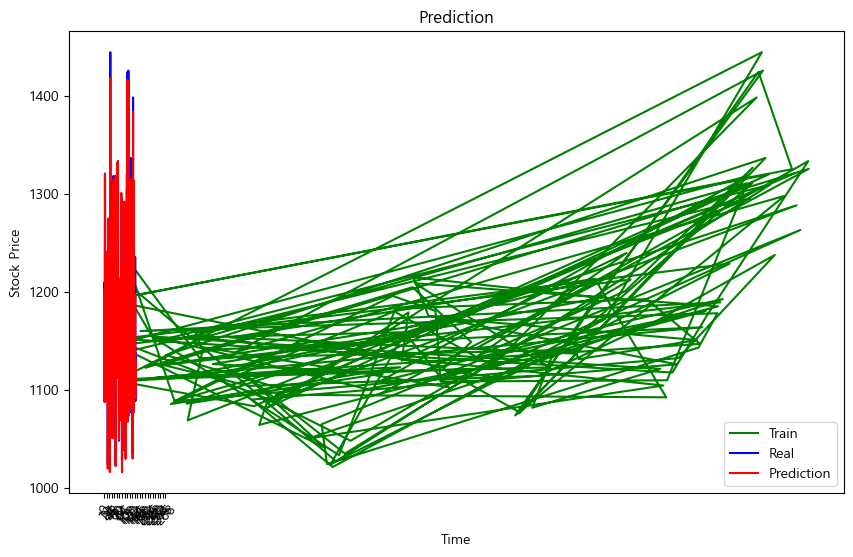

In [191]:
df__lr = result.iloc[:149][['Y', 'Y_pred(LR)']]
plt.figure(figsize=(10, 6))

# Add the training set to the plot:
# 이 부분에서 'y_pred' 대신 'df__lr['Y']'를 사용하도록 수정합니다.
plt.plot(df__lr['Y'], color='green', label='Train')

# Plot the test and prediction data:
# 이 부분에서 'result[y_pred]'와 '(result['Y'],color='blue', label='Real')'를 수정합니다.
plt.plot(range(len(df__lr)), df__lr['Y'], color='blue', label='Real')

# 이 부분에서 'range(len(result['Y_pred(LR)']))'와 '(result['Y_pred(LR)'], color='red', label='Prediction')'를 수정합니다.
plt.plot(range(len(df__lr)), df__lr['Y_pred(LR)'], color='red', label='Prediction')

plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.xticks(range(0, len(df__lr) + len(df__lr['Y']), 12), rotation=45)
plt.legend()
plt.show()


### 의사결정나무 기반 회귀 알고리즘 
 ##### 함수로 먼저 돌려보기 (과적합 예상)
 ##### Pipe grid search 로 돌려보기  

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# 이전 코드와 동일한 부분 (데이터 로딩 및 모델 리스트 생성)

df_1 = df.copy()   ## copy로 하면 데이터 프레임으로 저장되는게 아님!! --> copy()로 저장하고
X = df_1[['위안화원_시', '코스피시가', '달러위안화_시', 'WTI', '달러인덱스', '콜금리', '엔원_시']]  ## 그렇게 해야지 ()이 부분 없어도 오류 안남
y=df_1['달러원종가']                                                                             ## y가 데이터프레임 전체로 저장되서 shape오류가 났었음
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:

model_list = [forest_model, lgb_model, xgb_model]
    

for model in model_list:
    model.fit(X_train, y_train)  # 모델 학습
    y_preds = model.predict(X_test)
    print('{0}모델'.format(model.__class__.__name__))
    printRegressorResult(y_test, y_preds)


RandomForestRegressor모델
MSE: 44.597, RMSE: 6.678, R-squared: 0.992, MAE: 4.776, MAPE: 0.409%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1695
[LightGBM] [Info] Number of data points in the train set: 2654, number of used features: 7
[LightGBM] [Info] Start training from score 1149.586879
LGBMRegressor모델
MSE: 50.241, RMSE: 7.088, R-squared: 0.991, MAE: 5.201, MAPE: 0.445%
XGBRegressor모델
MSE: 56.349, RMSE: 7.507, R-squared: 0.990, MAE: 5.414, MAPE: 0.464%


In [ ]:
### 파이프라인 + XGBRegressor -> hyperparams 추출 -> 적용 
sclaer = MinMaxScaler()
xgb = XGBRegressor
feature = RFE(LinearRegression(), n_features_to_select=7)

pipe = Pipeline([
    ('scaler',sclaer),
    ('feature_select',feature),
    ('model', xgb_model)
])

param = {
    'model__max_depth': [2,3,5],
    'model__learning_rate' : [0.1,0.01]
}

grid = GridSearchCV(estimator=pipe, param_grid=param, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_select',
                                        RFE(estimator=LinearRegression(),
                                            n_features_to_select=7)),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_me...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [2, 3, 5]})

In [ ]:
grid.best_params_

{'model__learning_rate': 0.1, 'model__max_depth': 5}

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
### 파이프라인 + RandomForestRegressor -> hyperparams 추출 -> 적용 
sclaer = MinMaxScaler()
f_model = RandomForestRegressor
feature = RFE(LinearRegression(), n_features_to_select=7)

pipe_2 = Pipeline([
    ('scaler',sclaer),
    ('feature_select',feature),
    ('model', f_model)
])

param_2 = {
    'model__max_depth': [2,3,5],
    'model__learning_rate' : [0.1,0.01]
}

grid_ = GridSearchCV(estimator=pipe, param_grid=param, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_select',
                                        RFE(estimator=LinearRegression(),
                                            n_features_to_select=7)),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_me...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [2, 3, 5]})

In [ ]:
grid.best_params_

{'model__learning_rate': 0.1, 'model__max_depth': 5}

In [ ]:
lgb_model = LGBMRegressor(n_estimators=300)

lgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set =[(X_train, y_train),(X_valid, y_valid) ])

NameError: name 'X_valid' is not defined

In [ ]:


import lightgbm as lgb
lgb.plot_metric(lgb_model)

ValueError: eval results cannot be empty.